In [17]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as opencv

(1, 256)
[[[255   0   0]
  [255   1   0]
  [255   2   0]
  ...
  [255   0   3]
  [255   0   2]
  [255   0   1]]]


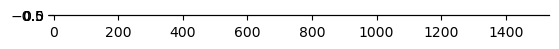

In [159]:
V1 = 255 * np.ones([1, 256])
V0 = np.zeros([1, 256])
Vi = np.array([np.arange(0,256)])
Vd = np.array([np.arange(256,0,-1)])

print(V1.shape)
# print(V0.shape)
# print(Vi.shape)
# print(Vd.shape)

ImagenH = np.zeros([1,1536,3], dtype=np.uint8)

ImagenH[:,:,0] = np.concatenate((V1, Vd, V0, V0, Vi, V1), axis=1)
ImagenH[:,:,1] = np.concatenate((Vi, V1, V1, Vd, V0, V0), axis=1)
ImagenH[:,:,2] = np.concatenate((V0, V0, Vi, V1, V1, Vd), axis=1)

print(ImagenH)
plt.imshow(ImagenH)

# It was hard to show in imshow function
# plt.imsave('prueba.jpg', ImagenH)


Exercise

Read an image and get only the Value array


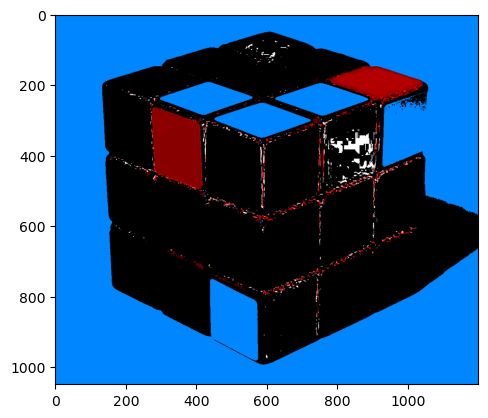

In [176]:

image = opencv.imread("cubo.jpg")

imageRGB = np.array(image)
imageRGB[:,:,0] = image[:,:,2]
imageRGB[:,:,1] = image[:,:,1]
imageRGB[:,:,2] = image[:,:,0]

imageHSV = opencv.cvtColor(imageRGB, opencv.COLOR_RGB2HSV)

Hue = imageHSV[:,:,0]
Saturation = imageHSV[:,:,1]
Value = imageHSV[:,:,2]

# plt.subplot(1, 3, 1)
# plt.imshow(Hue, cmap='gray')
# plt.subplot(1, 3, 2)
# plt.imshow(Saturation, cmap='gray')
# plt.subplot(1, 3, 3)
# plt.imshow(Value, cmap='gray')

[rows, cols, layers] = image.shape

for i in range(rows):
    for j in range(cols):
        if Saturation[i,j] <= 64 and Value[i,j] >= 192:
            temp = np.array([255,255,255])
        elif Saturation[i,j] <= 64 and Value[i,j] <= 192:
            temp = np.array([0,0,0])
        else:
            temp = ImagenH[0, Hue[i,j]*6, :]
            #print(temp)
            #temp = imageHSV[i,j,:]
        imageHSV[i,j,:] = temp



outputImage = opencv.cvtColor(imageHSV, opencv.COLOR_HSV2RGB)

plt.subplot()
plt.imshow(opencv.cvtColor(imageHSV, opencv.COLOR_HSV2RGB))
